### import the required modules

In [1]:
import datetime
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

### North Korea Nuclear Test Dates

In [2]:
test_dates = ['09-10-06', '25-05-09', '12-02-13',
              '06-01-16', '09-09-16', '03-09-17']

### Read in the NASDAQ Stock data
* Data downloaded from Yahoo Finance

In [3]:
nasdaq = pd.read_csv("data_stocks_nasdaq.csv")

In [4]:
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2769 non-null   object 
 1   Open       2769 non-null   float64
 2   High       2769 non-null   float64
 3   Low        2769 non-null   float64
 4   Close      2769 non-null   float64
 5   Adj Close  2769 non-null   float64
 6   Volume     2769 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.6+ KB


In [5]:
nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-10-02,2257.000000,2262.669922,2235.679932,2237.600098,2237.600098,1769170000
1,2006-10-03,2233.010010,2251.860107,2224.209961,2243.649902,2243.649902,1946800000
2,2006-10-04,2239.879883,2290.979980,2239.260010,2290.949951,2290.949951,2190280000
3,2006-10-05,2289.530029,2306.350098,2287.610107,2306.340088,2306.340088,1911090000
4,2006-10-06,2296.149902,2306.280029,2289.989990,2299.989990,2299.989990,1672470000


### Make Date field as index

In [6]:
nasdaq['Date'] = pd.to_datetime(nasdaq['Date'])

In [7]:
nasdaq.index = nasdaq['Date']

In [8]:
del nasdaq['Date']

In [9]:
nasdaq.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-10-02,2257.000000,2262.669922,2235.679932,2237.600098,2237.600098,1769170000
2006-10-03,2233.010010,2251.860107,2224.209961,2243.649902,2243.649902,1946800000
2006-10-04,2239.879883,2290.979980,2239.260010,2290.949951,2290.949951,2190280000
2006-10-05,2289.530029,2306.350098,2287.610107,2306.340088,2306.340088,1911090000
2006-10-06,2296.149902,2306.280029,2289.989990,2299.989990,2299.989990,1672470000


### Plot the stock data after latest nuclear test

In [10]:
nasdaq2017Sep = nasdaq[datetime.datetime(2017, 9, 3):]

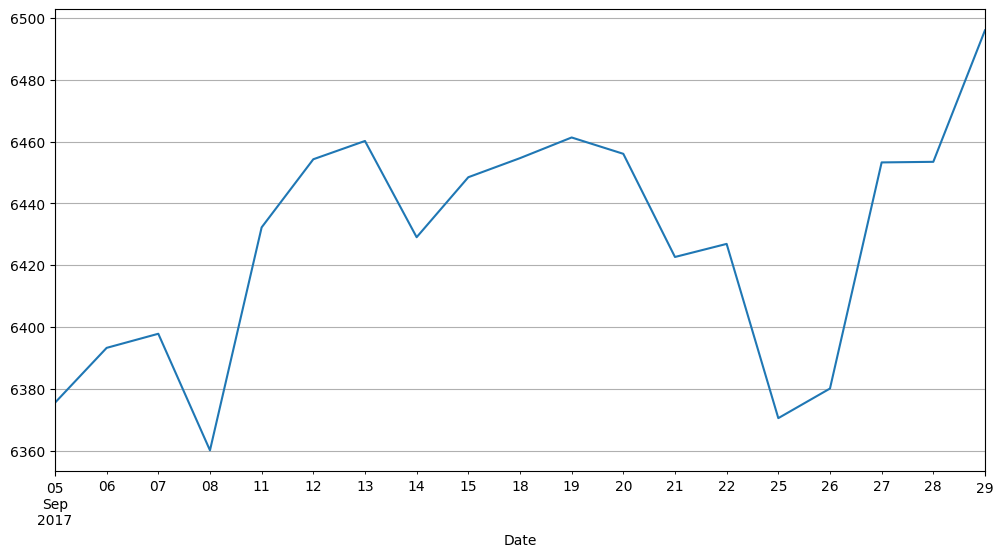

In [11]:
plt.figure(figsize=(12,6)) 
nasdaq2017Sep["Adj Close"].plot(grid = True) 
plt.show()

In [12]:
returns2017 = nasdaq2017Sep.apply(lambda x: x / x[0])

/var/folders/08/zn3bgg793fndlb4lnlcv_sxr0000gn/T/ipykernel_9948/1703098084.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns2017 = nasdaq2017Sep.apply(lambda x: x / x[0])


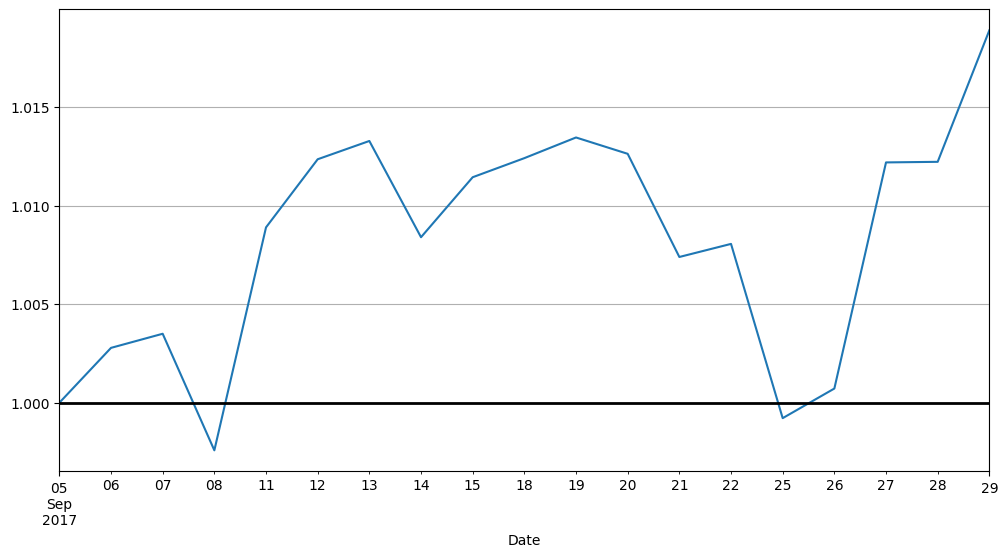

In [13]:
plt.figure(figsize=(12,6))
returns2017['Adj Close'].plot(grid = True).axhline(y = 1, color = "black", lw = 2)
plt.show()

### Visualize all events together

In [14]:
returns = []

for test_date in test_dates:
    start_date = datetime.datetime.strptime(test_date, "%d-%m-%y") 
    end_date = start_date + datetime.timedelta(days=14)
    returns.append(nasdaq[start_date:end_date].apply(lambda x: x / x[0]))

/var/folders/08/zn3bgg793fndlb4lnlcv_sxr0000gn/T/ipykernel_9948/2711347504.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns.append(nasdaq[start_date:end_date].apply(lambda x: x / x[0]))


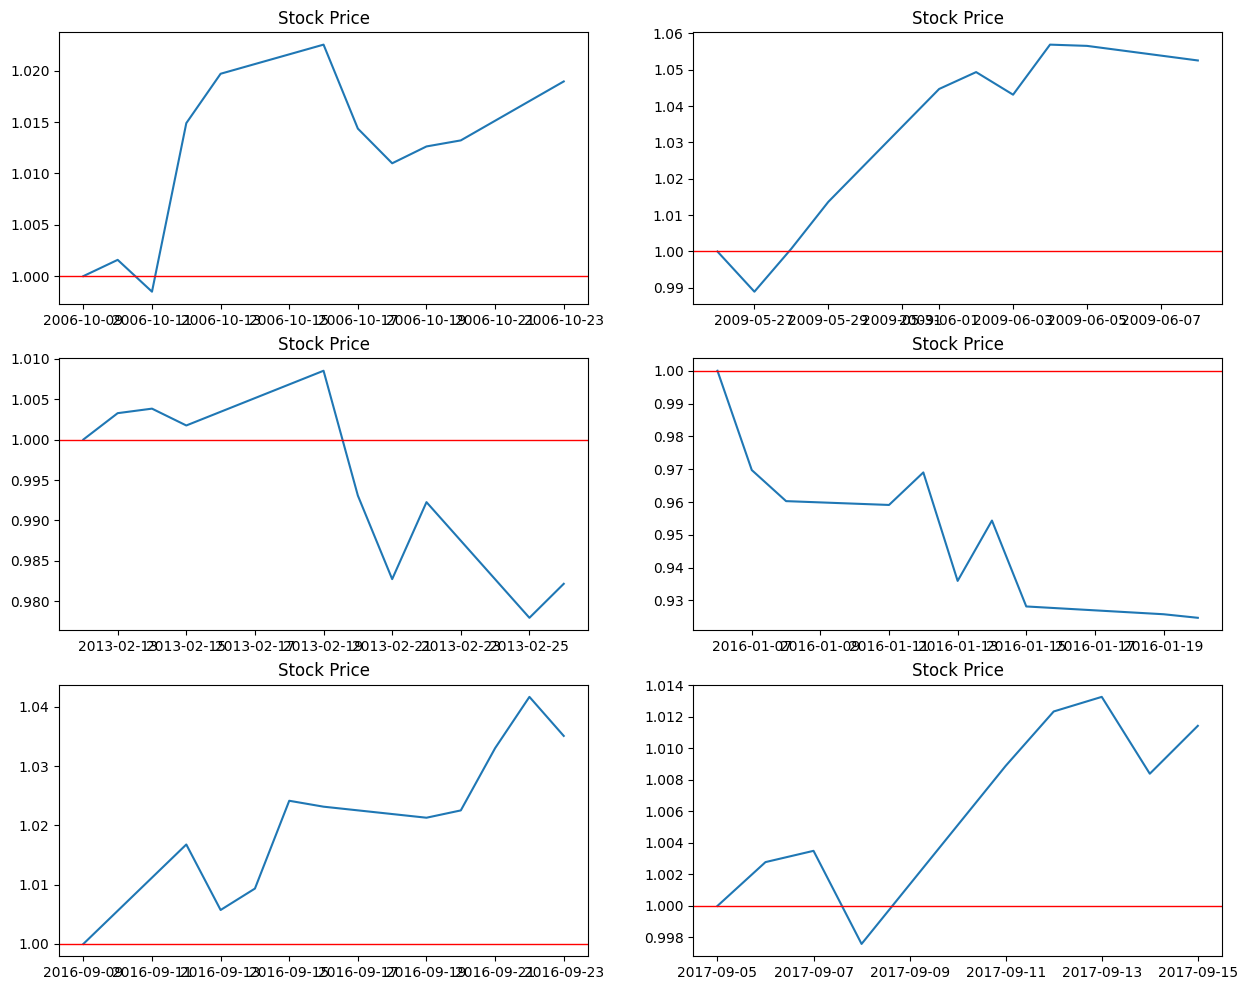

In [15]:
fig, ax = plt.subplots(3,2, figsize=(15,12))

count = 0

for row in ax:
    for col in row:
        col.plot(returns[count]['Adj Close'])
        col.set_title('Stock Price')
        col.axhline(y = 1, color = "red", lw = 1)
        count = count + 1
plt.show()